In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
earthquake_df = pd.read_csv("all_month.csv")
earthquake_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-10-13T02:06:45.547Z,62.258000,-149.688400,50.400000,2.20,ml,NaN,NaN,NaN,0.24000,...,2022-10-13T02:07:59.370Z,"13 km NE of Susitna North, Alaska",earthquake,NaN,1.000000,NaN,NaN,automatic,ak,ak
1,2022-10-13T01:53:35.883Z,35.951187,-97.873871,4.408605,2.17,ml,39.0,47.116041,0.092802,0.37182,...,2022-10-13T01:56:59.040Z,"4 km SE of Dover, Oklahoma",earthquake,1.821092,1.749625,NaN,31.0,automatic,ok,ok
2,2022-10-13T01:47:00.530Z,38.803001,-122.761169,0.570000,0.36,md,7.0,167.000000,0.002632,0.03000,...,2022-10-13T01:48:35.735Z,"3km N of The Geysers, CA",earthquake,0.560000,0.470000,NaN,1.0,automatic,nc,nc
3,2022-10-13T01:44:25.890Z,19.150667,-155.503174,33.330002,2.53,md,43.0,140.000000,NaN,0.12000,...,2022-10-13T02:05:07.625Z,"6 km SSW of Pāhala, Hawaii",earthquake,0.640000,0.760000,1.2,28.0,automatic,hv,hv
4,2022-10-13T01:41:24.537Z,64.795600,-151.394300,13.300000,1.50,ml,NaN,NaN,NaN,0.87000,...,2022-10-13T01:44:58.871Z,"42 km WSW of Manley Hot Springs, Alaska",earthquake,NaN,0.300000,NaN,NaN,automatic,ak,ak


In [3]:
# loading a data
earthquake_df = pd.read_csv("all_month.csv")

# creating a new column with value 1
earthquake_df["frequency"] = 1

# making a new hour column to insert to the data frame
new_time = []

for i in range(len(earthquake_df)):
        new_time.append(int(earthquake_df["time"][i][11:13]))

earthquake_df["new_time"] = new_time

# droping types other than "earthquakes"
only_earthquake_df = earthquake_df.drop(earthquake_df[earthquake_df.type != "earthquake"].index)

# grouping by hour and counting the sum for each hour
new_time_series = only_earthquake_df.groupby(["new_time"])["frequency"].count()

# making a new data frame that consists hour and count
new_time_df = pd.DataFrame(data = new_time_series)

# resetting the index
new_time_df.reset_index(inplace = True)
new_time_df


,new_time,frequency
0,0,389
1,1,429
2,2,448
3,3,488
4,4,480
5,5,445
6,6,432
7,7,431
8,8,428
9,9,481


<Figure size 1500x300 with 0 Axes>

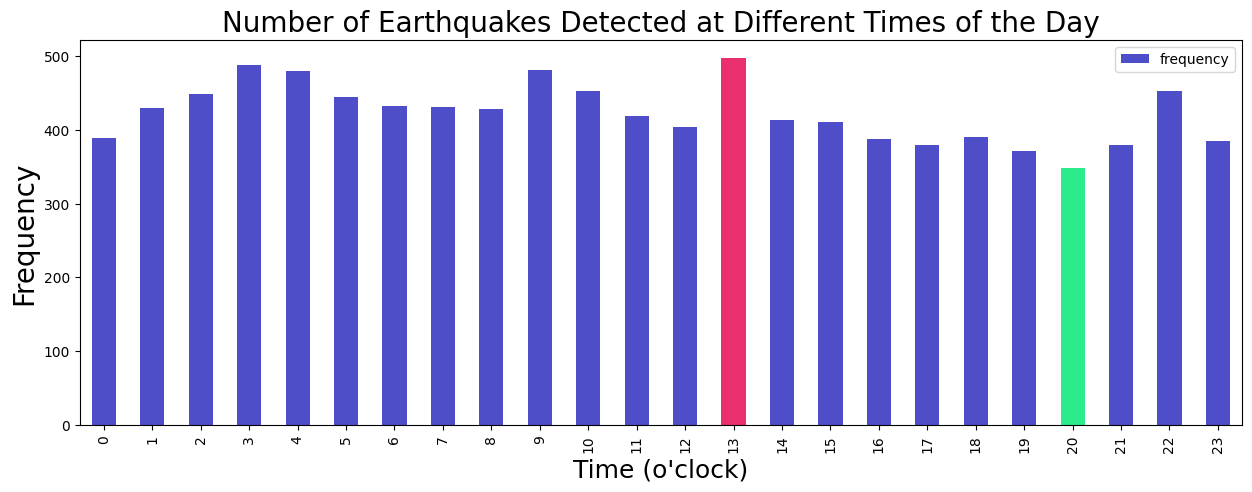

In [4]:
# creating a bar chart
plt.figure(figsize = (15, 3))

color = ["#E92F6D" if i == 13 else "#2CEB8B" if i == 20 else "#4E4EC9" for i in new_time_df["new_time"]]
new_time_df.plot.bar(x = "new_time" , y = "frequency", color = color, figsize = (15, 5))
plt.title("Number of Earthquakes Detected at Different Times of the Day", fontdict = {'fontsize': 20})
plt.ylabel("Frequency", fontdict = {'fontsize': 20})
plt.xlabel("Time (o'clock)", fontdict = {'fontsize': 18})

# saving chart as an image 
plt.savefig("earthquake_bar.png", dpi = 300)
plt.show()

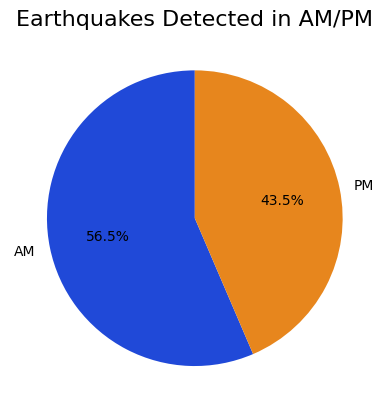

In [5]:
# creating a pie chart

am = new_time_df.loc[new_time_df["new_time"] < 13].sum()["frequency"]
pm = new_time_df.loc[new_time_df["new_time"] > 12].sum()["frequency"]

plt.figure()

labels = ["AM", "PM" ]
colors = ["#2049D8", "#E7861D"]

plt.pie([am, pm], labels = labels, colors = colors, autopct = "%1.1f%%", startangle = 90)
plt.title("Earthquakes Detected in AM/PM", fontdict = {'fontsize': 16})

plt.savefig("earthquake_pie.png", dpi = 300)

plt.show()

<Figure size 640x480 with 0 Axes>

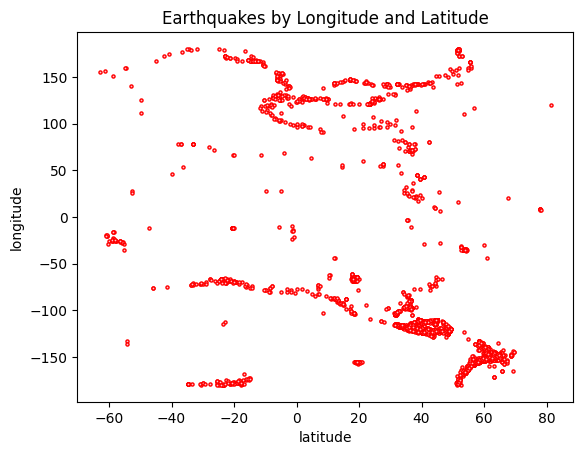

In [18]:
# scatter chart (longitude and latitude)
plt.figure()

earthquake_df.plot.scatter(x = "latitude", y = "longitude", c = "pink", edgecolors = "red", size = 5)
plt.title("Earthquakes by Longitude and Latitude")
plt.show()